In [1]:
import pandas as pd
import os
import datetime
import zipfile
import re
from Images_of_given_index import image_true_color
from IPython.display import Audio, display
from timeit import default_timer as timer
import glob
start = timer()
def alert():
  global start
  end= timer()
  print("\n\nDuration in minutes : " +  str((end - start)/60) + " minutes." )
  display(Audio(url='https://sound.peal.io/ps/audios/000/000/537/original/woo_vu_luvub_dub_dub.wav', autoplay=True))

In [2]:
def find_images(coords,sensing_date_FROM,sensing_date_TO,filename, sentinel=2) :
    global USERNAME
    global PASSWORD
    command = "dhusget.sh -u "+USERNAME+" -p "+PASSWORD +" -S "+sensing_date_FROM+" -E "+sensing_date_TO +" -c "+coords
    if sentinel !=0 :
        command = command + " -m Sentinel-"+ str(sentinel)
    command = command + " -q " + filename +  ".xml -C " + filename + ".csv"
    os.system(command)

In [3]:
def date_to_iso_format (date,time,before=True):
    date = str(date)
    if (date=="nan") :
        return "nan"
    splited = date.split('/')
    dt = datetime.datetime(int(splited[2]), int(splited[1]),  int(splited[0]))
    iso = str(dt.year) + "-" + str(dt.month) + "-" + str(dt.day)
    newtime = "T" + time + ".000Z"
    iso = iso +  newtime
    return iso

date_to_iso_format("07/08/2015", "06:44:00")

'2015-8-7T06:44:00.000Z'

In [4]:
def dms2dd(degrees, minutes, seconds, direction):
    dd = float(degrees) + float(minutes)/60 + float(seconds)/(60*60);
    if direction == 'E' or direction == 'N':
        dd *= -1
    return dd;
print(dms2dd(8,17,1.2876,'N'))
dms2dd(39,56,36.3696,'W')

-8.283691


39.943436

In [5]:
def dms_to_decimal(text,direction):
    print(text)
    splited = text.split(':')
    if len(splited) < 3 : 
        return "0"
    else :
        degrees = splited[0]
        minutes = splited[1]
        seconds = splited[2].replace('\'', "")
    result = dms2dd(degrees, minutes, seconds, direction)
    print( result )
    return result
print(dms_to_decimal("40:33:26.5068000000082''" , 'W'))
dms_to_decimal( "7:41:29.922000000001'' ", 'N' )

40:33:26.5068000000082''
40.557363
40.557363
7:41:29.922000000001'' 
-7.691645


-7.691645

In [6]:
USERNAME = ''
PASSWORD = ''
lon1="-4"
lat1="30"
lon2="26"
lat2="46"
coords = lon1 + "," + lat1 + ":" + lon2 + "," + lat2 
sensing_date_FROM = "2015-01-01T06:00:00.000Z"
sensing_date_TO = "2016-01-01T06:00:00.000Z"
filename = "./images_with_fires_results/test"
#find_images(coords,sensing_date_FROM,sensing_date_TO,filename)

# Find Images

In [7]:
datetimes = [
    "2017-06-16T00:00:00.000Z",
    "2017-06-17T00:00:00.000Z",
    "2017-06-18T00:00:00.000Z",
    "2017-06-19T00:00:00.000Z",
    "2017-06-20T00:00:00.000Z",
    "2017-06-21T00:00:00.000Z",
    "2017-06-22T00:00:00.000Z",
    "2017-06-23T00:00:00.000Z",
    "2017-06-24T00:00:00.000Z"
]
#39° 57′ N, 8° 14′ O
#40:33:26.5068000000082''
#7:41:29.922000000001''
lat = "39:57:26.5068000000082''"
lon = "8:14:29.922000000001''"
lat =dms_to_decimal(lat,"W")
lon =dms_to_decimal(lon,"N")
lon1=str( float(lon)-0.5 )
lat1=str( float(lat)-0.5 )
lon2=str( float(lon)+0.5 )
lat2= str( float(lat)+0.5 )
coords = lon1 + "," + lat1 + ":" + lon2 + "," + lat2 
for i in range(len(datetimes)-1):
    filename = "./fires_pedrogao/index"+str(i)
    sensing_date_FROM =  datetimes[i]
    sensing_date_TO = datetimes[i+1]
    print(coords,sensing_date_FROM,sensing_date_TO,filename)
    print("\n")
    find_images(coords,sensing_date_FROM,sensing_date_TO,filename,2)

39:57:26.5068000000082''
39.95736300000001
8:14:29.922000000001''
-8.241645
-8.741645,39.45736300000001:-7.741645,40.45736300000001 2017-06-16T00:00:00.000Z 2017-06-17T00:00:00.000Z ./fires_pedrogao/index0


-8.741645,39.45736300000001:-7.741645,40.45736300000001 2017-06-17T00:00:00.000Z 2017-06-18T00:00:00.000Z ./fires_pedrogao/index1


-8.741645,39.45736300000001:-7.741645,40.45736300000001 2017-06-18T00:00:00.000Z 2017-06-19T00:00:00.000Z ./fires_pedrogao/index2


-8.741645,39.45736300000001:-7.741645,40.45736300000001 2017-06-19T00:00:00.000Z 2017-06-20T00:00:00.000Z ./fires_pedrogao/index3


-8.741645,39.45736300000001:-7.741645,40.45736300000001 2017-06-20T00:00:00.000Z 2017-06-21T00:00:00.000Z ./fires_pedrogao/index4


-8.741645,39.45736300000001:-7.741645,40.45736300000001 2017-06-21T00:00:00.000Z 2017-06-22T00:00:00.000Z ./fires_pedrogao/index5


-8.741645,39.45736300000001:-7.741645,40.45736300000001 2017-06-22T00:00:00.000Z 2017-06-23T00:00:00.000Z ./fires_pedrogao/index6




# Download images

In [ ]:
files = glob.glob("./fires_pedrogao/*.csv")
for file in files : 
    global USERNAME, PASSWORD
    if (os.path.getsize(file) >0 ) :
        downloads = pd.read_csv(file, sep=',' , encoding="utf-8",na_values="nan",header=None)
        splited = file.split('\\')
        id_fire = splited[len(splited)-1][:-4]
        for index, row in downloads.iterrows():
            outputpath = "../../Satellite_img_Pedrogao/" + id_fire
            if (not os.path.isdir(outputpath)):
                os.mkdir(outputpath)
            outputpath = outputpath + '/' + row[0] + '.zip'
            command = "wget --continue --user="+USERNAME+" --password="+PASSWORD+" \""+ row[1] + "/$value" +"\" -O " + outputpath
            print(outputpath,"\n\n")
            os.system(command)

# Unnzipping and setting up downloaded images

In [ ]:
indexs = os.listdir("../../Satellite_img_Pedrogao/") 
print ( indexs)  # indexes of fires of images founded
for index in indexs :
    index_id = index[5:]
    path = "../../Satellite_img_Pedrogao/index"+ index_id
    images_ids = os.listdir(path) # images founded for index choosen
    for file in images_ids : 
        print(file)
        path_with_img_id = path + "/" + file
        if ( zipfile.is_zipfile(path_with_img_id) and os.stat(path_with_img_id).st_size >0  ) :
            print(index)
            print("ISZIP:",zipfile.is_zipfile(path_with_img_id))
            print("SIZE:", os.stat(path_with_img_id).st_size )
            with zipfile.ZipFile(path_with_img_id,"r") as zip_ref:
                path_output = path + "/" + file [ 37 :  ]
                cut = len(path_output)-4
                path_output = path_output [ : cut ]
                print(path_output)
                names = zip_ref.namelist()
                regexp = re.compile(r'.*SAFE/GRANULE/.*/IMG_DATA/R10m/.*B0[2348]')
                img_data = []
                for f in names :
                    if  regexp.search(f) :
                        img_data.append(f)
                print(len(img_data))
                zip_ref.extractall(  members =  img_data , path = path_output )
        
        os.remove(path_with_img_id)

# Visualizing images

In [8]:
indexs = os.listdir("../../Satellite_img_Pedrogao/") 
n_total = 0
for index in indexs :
    index_id = index[5:]
    path = "../../Satellite_img_Pedrogao/index"+ index_id
    images_ids = os.listdir(path) 
    for image_id in images_ids : 
        n_total = n_total + 1
print("Number of Images = ",n_total )

Number of Images =  2




->>>>>>>>>>>>>>>>>> 1    _T29SND_20170617T113319       Image 1  of  2   

 


C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


6279 6679 0 100


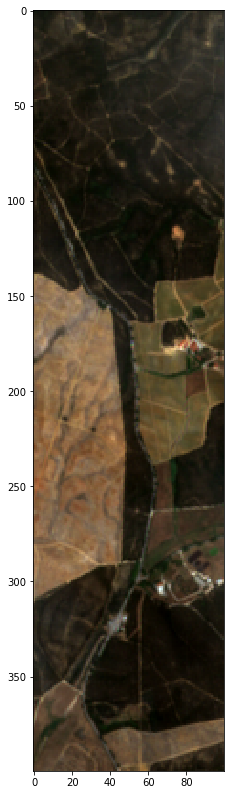



Duration in minutes : 1.6096934999999999 minutes.




->>>>>>>>>>>>>>>>>> 1    _T29TNE_20170617T113319       Image 2  of  2   

 


C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))
C:\ProgramData\Anaconda3\envs\geo_py37\lib\site-packages\pyproj\crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


6279 6679 7469 7869


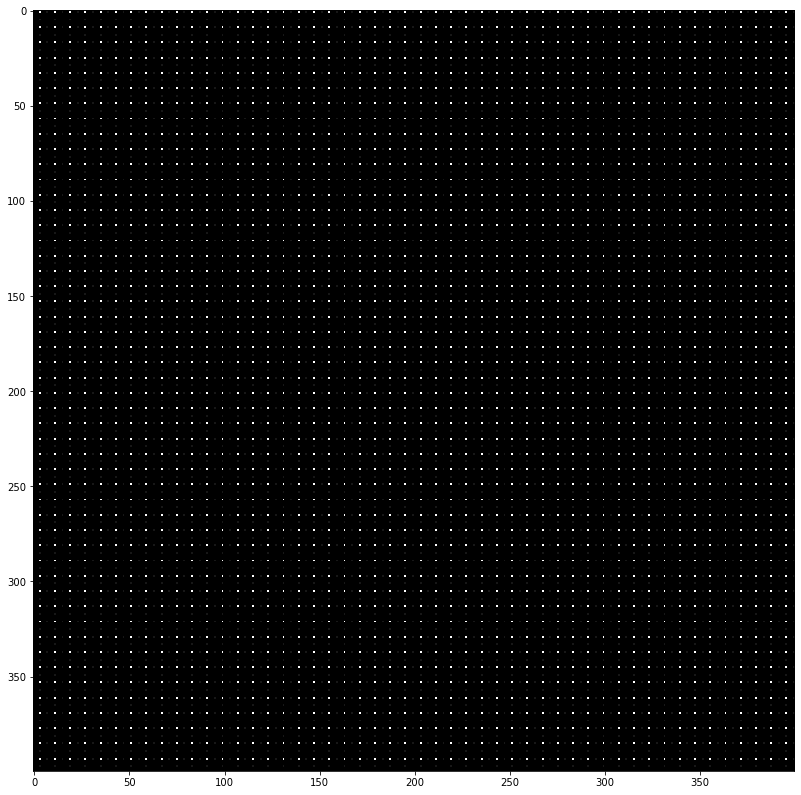



Duration in minutes : 3.4412549566666666 minutes.


In [9]:
indexs = os.listdir("../../Satellite_img_Pedrogao/")
n=0
for index in indexs :
    index_id = index[5:]
    path = "../../Satellite_img_Pedrogao/index"+ index_id
    images_ids = os.listdir(path) # images founded for index choosen
    for image_id in images_ids :
        n= n + 1 
        print("\n\n->>>>>>>>>>>>>>>>>>", index_id,"  " ,image_id, "      Image", n ," of " , n_total ,"  \n\n " )
        #if index_id == '12463' and image_id == "_T29SMD_20150728T113618" :
        image_true_color(index_id,image_id ,"../../Satellite_img_Pedrogao/", lon,lat,True)
        alert()

In [10]:
alert()



Duration in minutes : 3.4416159283333334 minutes.
